# 소상공인진흥공단 상가업소

# 필요한 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

# 시각화를 위한 한글폰트 설정하기

In [2]:
# 한글폰트 설정
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [3]:
# 폰트가 선명하게 보이도록 retina 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17264\3941369629.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


<AxesSubplot:title={'center':'한글폰트'}>

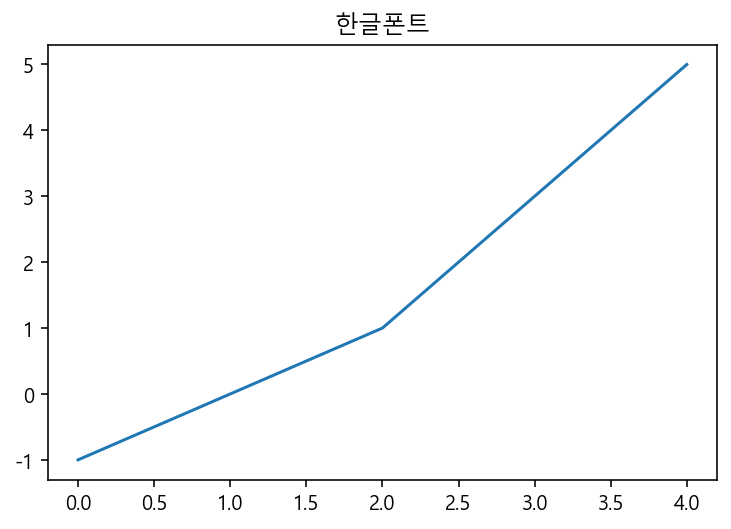

In [4]:
# 한글폰트와 마이너스 폰트 설정 확인
pd.Series([-1,0,1,3,5]).plot(title='한글폰트')

# 구글 코랩 위한 코드

# 데이터 불러오기

In [1]:
df=pd.read_csv('data/상가업소정보_201912_01.csv',sep='|')
df.shape

NameError: name 'pd' is not defined

## 데이터 미리보기

In [6]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922


## info 보기

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

## 결측치 보기

<AxesSubplot:>

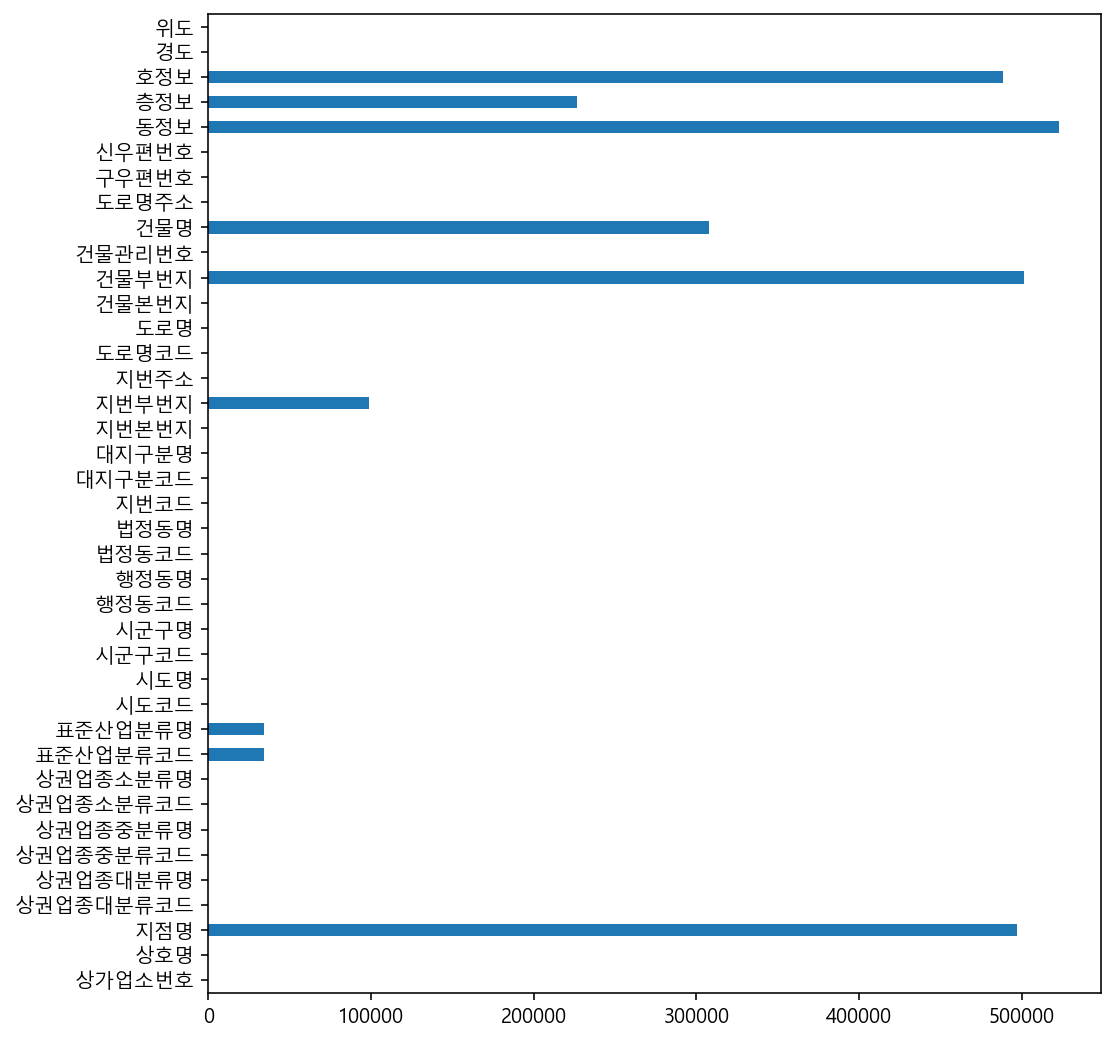

In [8]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있습니다.
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에 
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있습니다.
df.isnull().sum().plot.barh(figsize=(8,9))

## 사용하지 않는 칼럼 제거하기

In [9]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
# 여기에서는 사용할 컬럼만 따로 모아서 사용합니다.
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
df=df[columns].copy()
df.shape

(573680, 11)

In [10]:
# 제거 후 메모리 사용량 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


# 색인으로 서브셋 가져오기

## 서울만 따로 보기

In [11]:
# 시도명이 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.
df_seoul=df[df['시도명']=='서울특별시'].copy()
df_seoul.shape

(407376, 11)

## 일부 텍스트가 들어가는 데이터만 가져오기

In [12]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.
df_seoul['상호명_소문자']=df_seoul['상호명'].str.lower()

In [13]:
# ediya 를 "상호명_소문자" 컬럼으로 가져옵니다.
# '상호명_소문자'컬럼으로 '이디야|ediya' 를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('이디야|이디아|ediya'),'상호명_소문자']

1675       이디야커피
2957       이디야커피
8534       이디야커피
13913        이디아
14605      이디야커피
           ...  
557161     이디야커피
557163     이디야커피
557498     이디야커피
565196    이디아스포츠
568636     이디야커피
Name: 상호명_소문자, Length: 543, dtype: object

In [14]:
# 상호명에서 스타벅스만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 스타벅스|starbucks 의 "상호명_소문자"로 갯수를 세어봅니다.
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks'),'상호명_소문자'].shape

(506,)

In [15]:
# '상호명_소문자'컬럼으로  '스타벅스|starbucks|이디야|이디아|ediya'를 가져와 df_cafe 변수에 담습니다.
df_cafe=df_seoul[
    df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()
df_cafe.shape

(1049, 12)

In [16]:
# ~은 not을 의미합니다. 스타벅스가 아닌 데이터는 이디야로 넣어주어도 되지만
# 아래 코드처럼 결측치를 이디야로 채워줘도 괜찮습니다.
# df_cafe.loc[~df_cafe['상호명'].str.contains('스타벅스|starbucks'), '브랜드명'] = '이디야'
df_cafe.loc[df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'),'브랜드명']='스타벅스'
df_cafe.loc[~df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'),'브랜드명']='이디야'
df_cafe[['상호명_소문자','브랜드명']].head()

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,이디야


In [17]:
# 스타벅스를 제외한 데이터는 이디야이기 때문에 이디야로 브랜드명을 만듭니다.
# df_cafe["브랜드명"].fillna("이디야")


In [18]:
# df_cafe에 담긴 상호명','브랜드명'으로 미리보기를 합니다.
df_cafe[['상호명','브랜드명']].tail()

,상호명,브랜드명
567090,스타벅스,스타벅스
567828,스타벅스,스타벅스
568636,이디야커피,이디야
570096,스타벅스,스타벅스
571052,스타벅스,스타벅스


## 시각화

### 분류별 countplot 그리기

<AxesSubplot:>

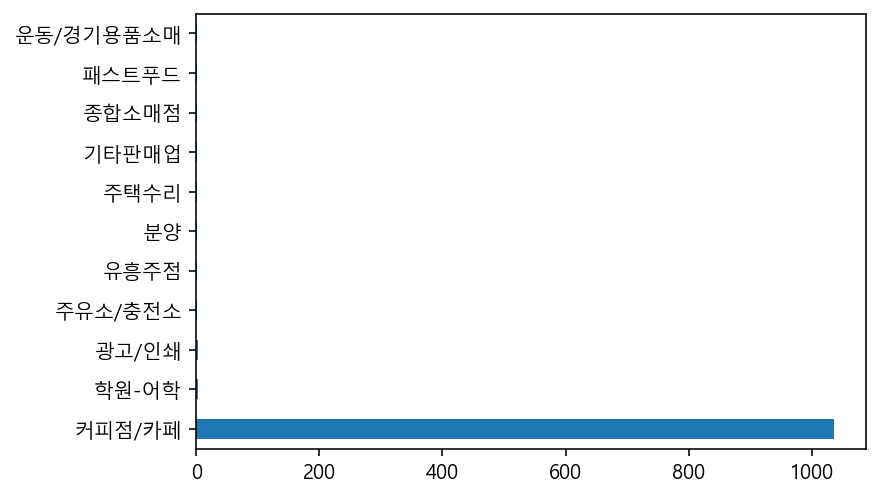

In [19]:
# "상권업중분류명"을 countplot 으로 시각화하고 분류 혹은 데이터가 잘못 색인된 데이터가 있는지 봅니다.
df_cafe['상권업종중분류명'].value_counts().plot.barh()

In [20]:
print(df_cafe.shape)
df_cafe=df_cafe[df_cafe['상권업종중분류명']=='커피점/카페'].copy()
df_cafe.shape

(1049, 13)


(1036, 13)

In [21]:
# 브랜드명으로 각 카페의 갯수를 세어봅니다.
df_cafe['브랜드명'].value_counts()

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

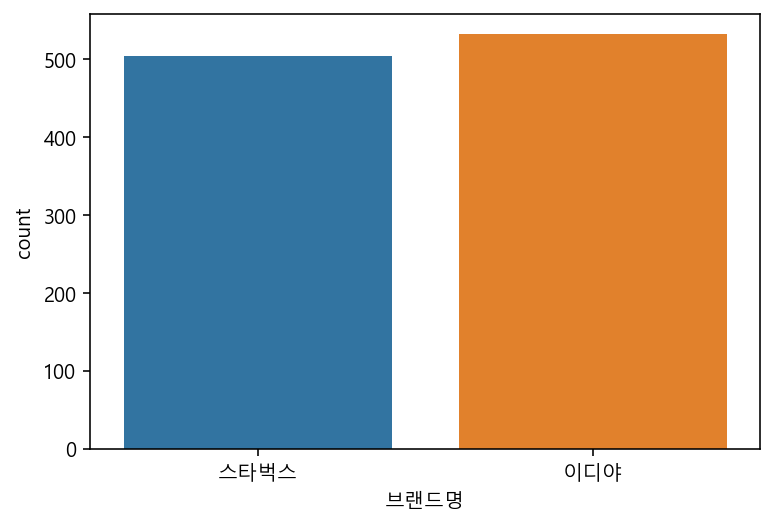

In [22]:
# 브랜드명을 막대그래프로 그려봅니다.
sns.countplot(data=df_cafe,x='브랜드명')

<AxesSubplot:xlabel='시군구명', ylabel='count'>

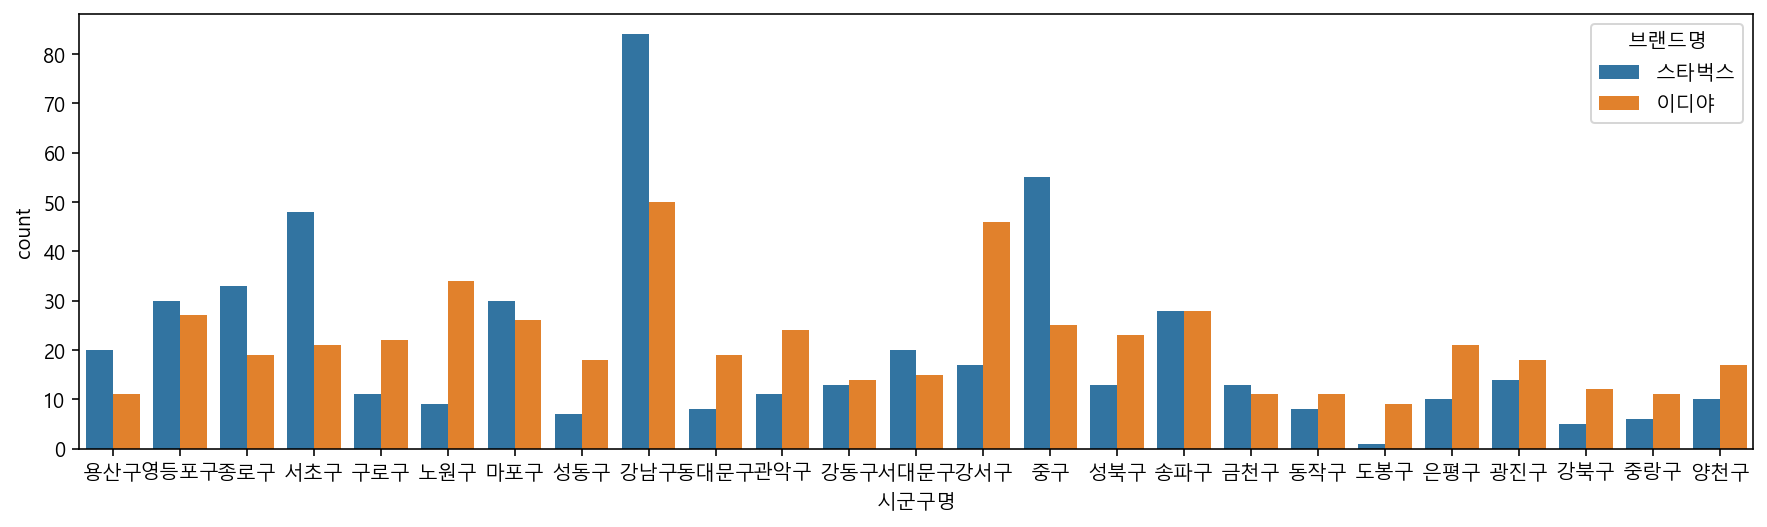

In [23]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe,x='시군구명',hue='브랜드명')

### scatterplot 그리기

<AxesSubplot:xlabel='경도', ylabel='위도'>

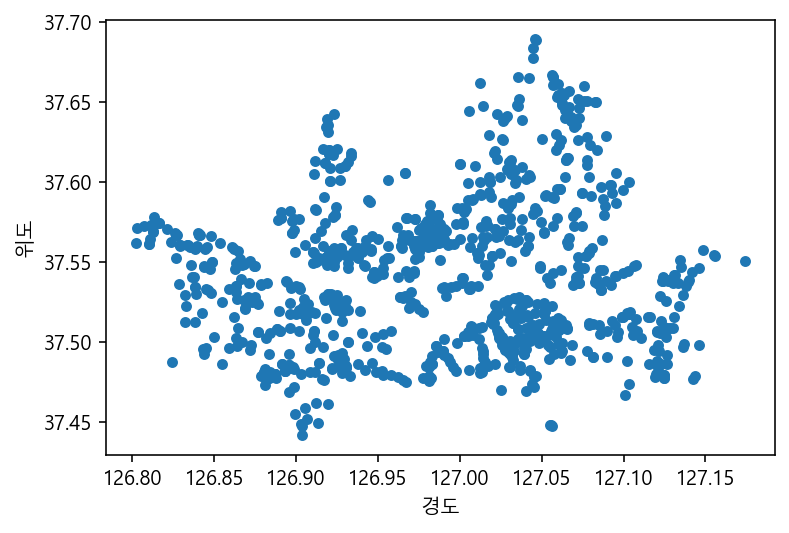

In [24]:
# pandas로 scatterplot을 그려봅니다.
df_cafe[['위도','경도']].plot.scatter(x='경도',y='위도')

<AxesSubplot:xlabel='경도', ylabel='위도'>

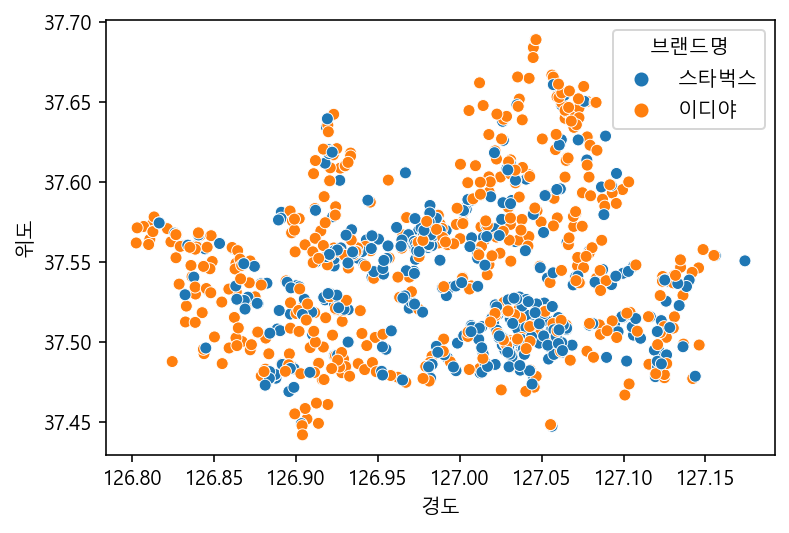

In [25]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.
sns.scatterplot(data=df_cafe,x='경도',y='위도',hue='브랜드명')

### jointplot 그리기

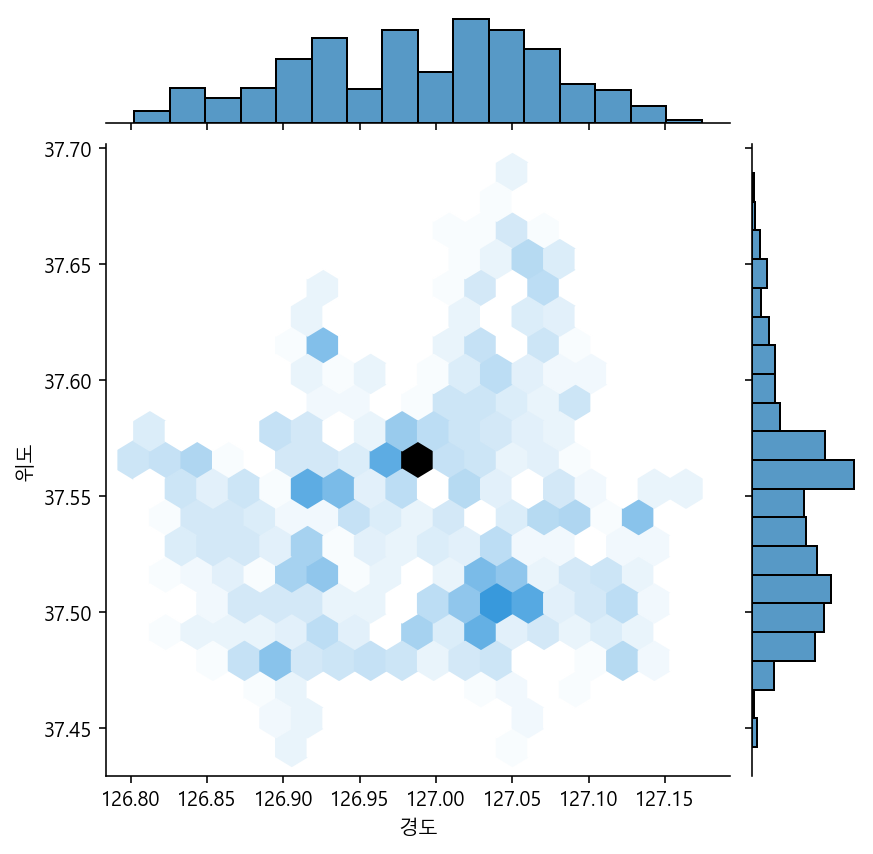

In [26]:
# jointplot 그리기
sns.jointplot(data=df_cafe,x='경도',y='위도',kind='hex')

# 구별 브랜드별 점포수

## groupby와 pivot_table로 구별 스타벅스, 이디야 매장수구하기

### groupby로 구별 매장 수 구하기

In [27]:
# 구별로 브랜드별 점포수를 구합니다.
# groupby 를 사용하면 구별로 그룹화 해서 점포수를 구할 수 있습니다.
# 그룹화한 결과를 df_cafe_vs 변수에 담아서 재사용합니다.
df_cafe_vs=df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()
df_cafe_vs.head()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
Name: 상호명, dtype: int64

In [28]:
df_cafe_vs.to_frame().head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [29]:
# reset_index 로 인덱스를 컬럼으로 만듭니다.
df_cafe_vs=df_cafe_vs.reset_index()
df_cafe_vs.head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [30]:
# groupby '시군구명', '브랜드명' 으로 갯수를 세어봅니다.
# 결과에 대한 데이터프레임 컬럼명을 ['구', '브랜드명', '매장수'] 로 지정합니다.
df_cafe_vs.columns=['구', '브랜드명', '매장수']
df_cafe_vs.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


### pivot_table로 구별 매장 수 구하기

In [31]:
# 위에서 했던 과정을 pivot_table 로 구합니다.
pivot=pd.pivot_table(data=df_cafe,index=['시군구명','브랜드명'],
               values='상호명',
               aggfunc='count')
pivot.head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [32]:
# 특정 구 데이터만 가져와서 보기
pivot.loc["강남구"]

,상호명
브랜드명,
스타벅스,84
이디야,50


## 막대그래프로 시각화하기

<AxesSubplot:xlabel='구', ylabel='매장수'>

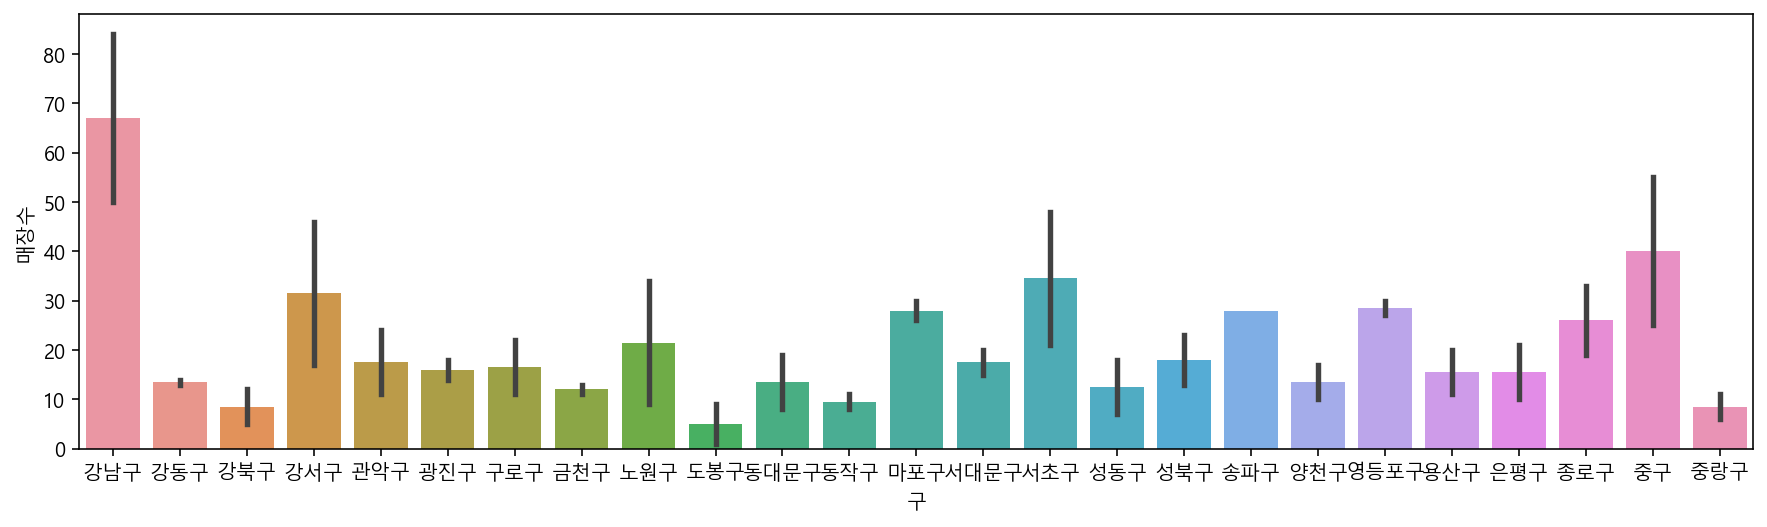

In [65]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 합니다.
plt.figure(figsize=(15,4))
sns.barplot(data=df_cafe_vs,x='구',y='매장수')

In [34]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 합니다.
# barplot 정렬하기


<AxesSubplot:xlabel='시군구명,브랜드명'>

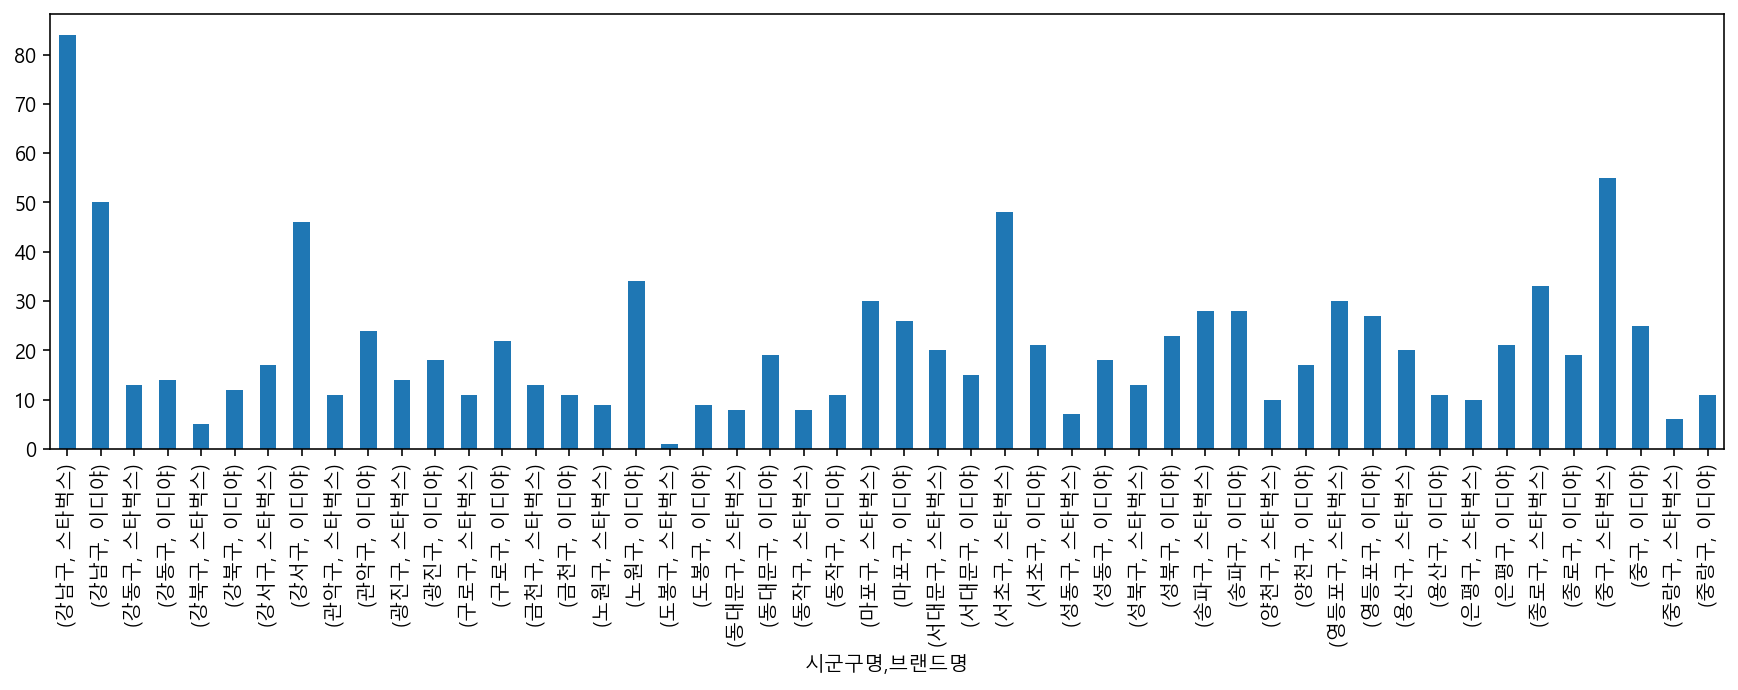

In [35]:
# groupby 를 통해 "시군구명", "브랜드명"으로 그룹화를 하고 "상호명"의 갯수를 세어봅니다.
# 갯수를 셀때는 count를 사용합니다.
group=df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()
group.plot.bar(figsize=(15,4))

<AxesSubplot:xlabel='시군구명'>

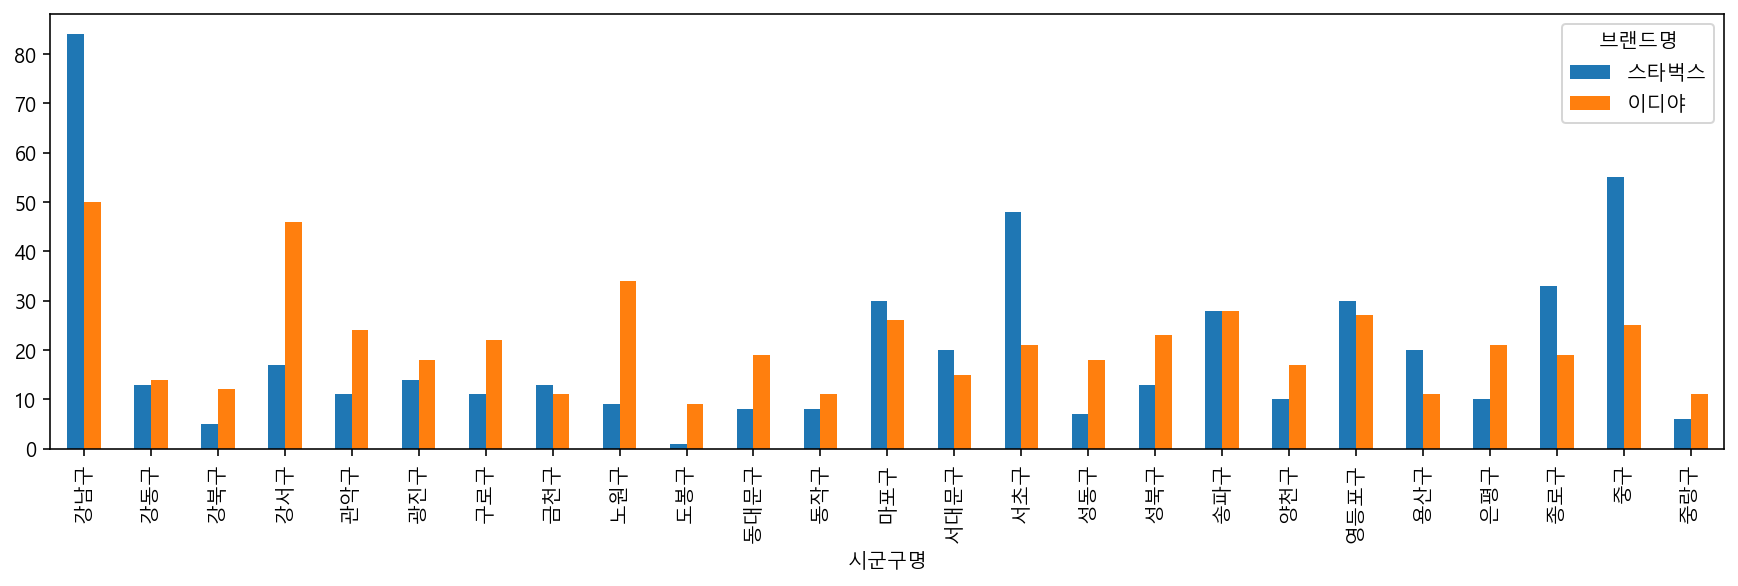

In [36]:
# 위에서 groupby 로 데이터를 집계한 결과를 시각화 합니다.
group.unstack().plot.bar(figsize=(15,4))

In [37]:
# pivot_table 을 이용해서 구별 스타벅스, 이디야 매장수를 구합니다.

pivot=pd.pivot_table(data=df_cafe,index='시군구명',
                     columns='브랜드명',
                     values='상호명',aggfunc='count')

<AxesSubplot:xlabel='시군구명'>

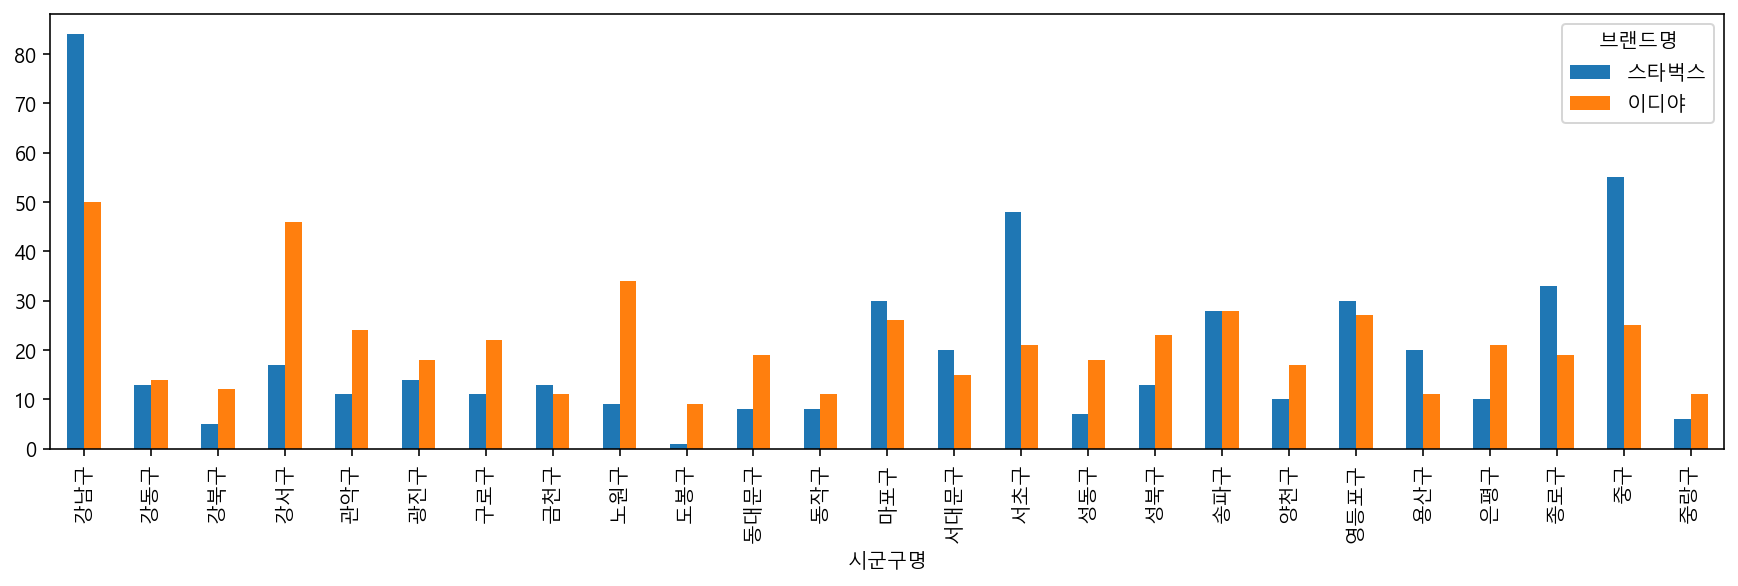

In [38]:
pivot.plot.bar(figsize=(15,4))

In [39]:
# 시군구명의 unique 값만 가져와서 리스트로 만듭니다.

# 시군구명을 정렬합니다.

# 슬라이싱을 통해 5개만 미리보기 합니다.


<AxesSubplot:xlabel='시군구명', ylabel='count'>

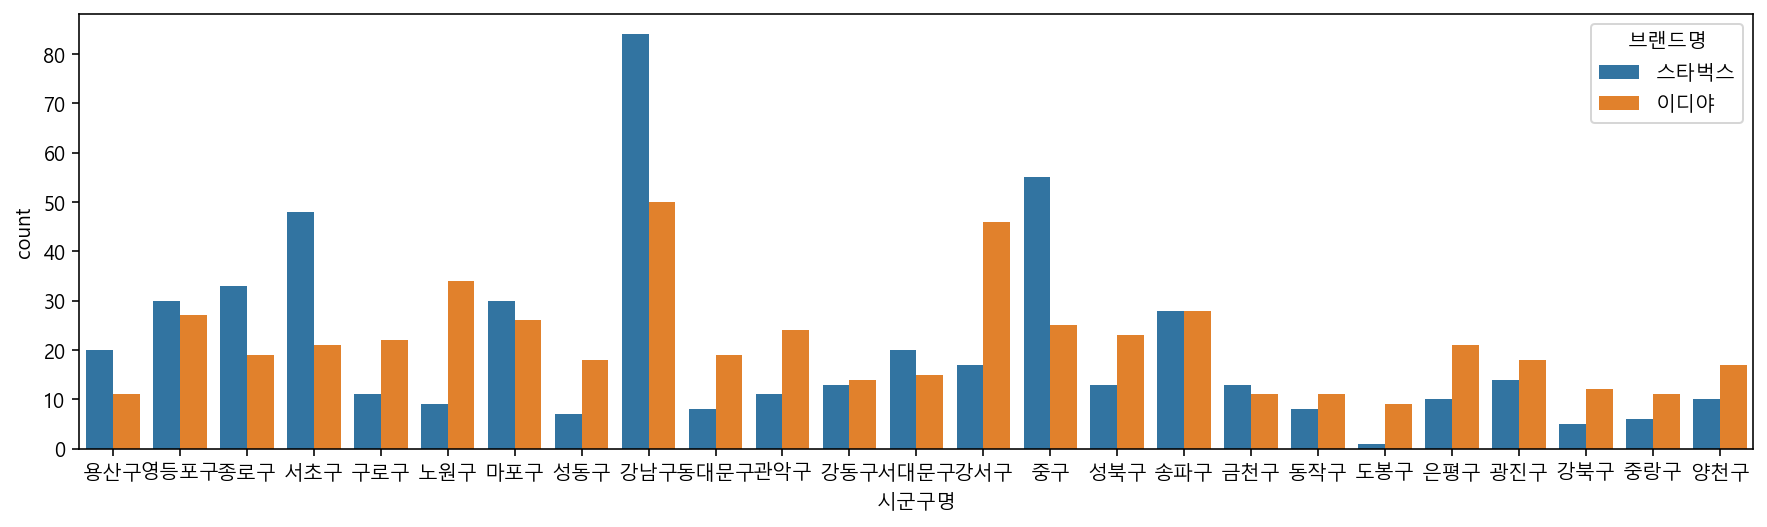

In [40]:
# Pandas 로 시각화를 하는 방법도 있지만 seaborn의 countplot을 사용하면 해당 컬럼의 수를 계산해서 시각화를 해줍니다.
# hue 옵션을 사용하게 되면 값에 따라 다른 색상으로 그리게 됩니다. 
# hue 옵션을 사용할 때는 2~3개 정도의 카테고리 형태의 데이터를 사용하는 것이 적합합니다.
# 여기에서는 브랜드명에 따라 다른 색상으로 표시할 수 있도록 합니다.
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe,x='시군구명',hue='브랜드명')

# Folium으로 지도 활용하기

In [41]:
import folium

In [42]:
lat=df_cafe['위도'].mean()
long=df_cafe['경도'].mean()
lat,long

(37.5429213982126, 126.9887885123524)

## 스타벅스 이디야 카페매장 전체분포

In [45]:
m=folium.Map([lat,long],zoom_start=12)
for i in df_cafe.index:
    sub_lat=df_cafe.loc[i,'위도']
    sub_long=df_cafe.loc[i,'경도']
    

    title=f"{df_cafe.loc[i,'상호명']}-{df_cafe.loc[i,'도로명주소']}"
    
    color='green'
    if df_cafe.loc[i,'브랜드명']=='이디야':
                color='blue'

    folium.CircleMarker([sub_lat,sub_long],
                        radius=3,
                        color=color,
                 tooltip=title).add_to(m)
    
m

## choropleth를 위한 GeoJSON 파일로드

In [46]:
geo_path = 'data/seoul_municipalities_geo_simple.json'

import json
geo_json = json.load(open(geo_path, encoding="utf-8"))
geo_json['features'][0]['properties']['name']

'강동구'

## 스타벅스 매장 분포

In [47]:
df_star=df_cafe_vs[df_cafe_vs['브랜드명']=='스타벅스'].copy()
df_star.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
2,강동구,스타벅스,13
4,강북구,스타벅스,5
6,강서구,스타벅스,17
8,관악구,스타벅스,11


In [48]:
geo_json['features'][0]['properties']['name']

'강동구'

In [49]:
m=folium.Map([lat,long])
folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_star,
    columns=["구", "매장수"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="스타벅스 매장수",
).add_to(m)

m

## 이디야 매장 분포

In [51]:
df_ediya=df_cafe_vs[df_cafe_vs['브랜드명']=='이디야'].copy()

In [52]:
m=folium.Map([lat,long])
folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_ediya,
    columns=["구", "매장수"],
    key_on="feature.properties.name",
    fill_color="Blues",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="이디야 매장수",
).add_to(m)

for i in df_cafe.index:
    sub_lat=df_cafe.loc[i,'위도']
    sub_long=df_cafe.loc[i,'경도']
    

    title=f"{df_cafe.loc[i,'상호명']}-{df_cafe.loc[i,'도로명주소']}"
    
    color='green'
    if df_cafe.loc[i,'브랜드명']=='이디야':
                color='blue'

    folium.CircleMarker([sub_lat,sub_long],
                        radius=3,
                        color=color,
                 tooltip=title).add_to(m)

m

## 매장 수 크기 반영해 CircleMaker 그리기

In [53]:
df_vs=df_cafe_vs.pivot(index='구',columns='브랜드명',values='매장수')
df_vs['매장수비교']=df_vs['스타벅스']-df_vs['이디야']>0
df_vs

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,True
강동구,13,14,False
강북구,5,12,False
강서구,17,46,False
관악구,11,24,False
광진구,14,18,False
구로구,11,22,False
금천구,13,11,True
노원구,9,34,False


In [54]:
df_vs['매장수비교']=df_vs['매장수비교'].astype(float)
df_vs

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,1.0
강동구,13,14,0.0
강북구,5,12,0.0
강서구,17,46,0.0
관악구,11,24,0.0
광진구,14,18,0.0
구로구,11,22,0.0
금천구,13,11,1.0
노원구,9,34,0.0


In [55]:
df_vs=df_vs.reset_index()
df_vs.head()

브랜드명,구,스타벅스,이디야,매장수비교
0,강남구,84,50,1.0
1,강동구,13,14,0.0
2,강북구,5,12,0.0
3,강서구,17,46,0.0
4,관악구,11,24,0.0


## Choropleth로 매장수의 많고 적음에 따라 표현하기

In [56]:
m=folium.Map([lat,long])
folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_vs,
    columns=["구", "매장수비교"],
    key_on="feature.properties.name",
    fill_color="BuGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수비교',
).add_to(m)

m

In [58]:
df_gu_mean=df_cafe.pivot_table(index='시군구명',values=['경도','위도'],aggfunc='mean')
df_gu_mean=df_gu_mean.reset_index()
df_gu_mean.head()

,시군구명,경도,위도
0,강남구,127.046129,37.505744
1,강동구,127.135417,37.540316
2,강북구,127.022897,37.631146
3,강서구,126.837883,37.555966
4,관악구,126.935210,37.482054


In [59]:
df_vs=df_vs.merge(df_gu_mean,how='inner',left_on='구',right_on='시군구명')
df_vs

,구,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,강남구,84,50,1.0,강남구,127.046129,37.505744
1,강동구,13,14,0.0,강동구,127.135417,37.540316
2,강북구,5,12,0.0,강북구,127.022897,37.631146
3,강서구,17,46,0.0,강서구,126.837883,37.555966
4,관악구,11,24,0.0,관악구,126.935210,37.482054
5,광진구,14,18,0.0,광진구,127.083297,37.543770
6,구로구,11,22,0.0,구로구,126.877456,37.494061
7,금천구,13,11,1.0,금천구,126.892196,37.469287
8,노원구,9,34,0.0,노원구,127.067171,37.642393
9,도봉구,1,9,0.0,도봉구,127.040474,37.665765


In [60]:

for i in df_vs.index:
    sub_long=df_vs.loc[i,'경도']
    print(df_vs.loc[i,'구'],sub_lat,sub_long)

    

강남구 37.582341142203 127.04612924851483
강동구 37.582341142203 127.13541705768309
강북구 37.582341142203 127.02289728220342
강서구 37.582341142203 126.83788319929005
관악구 37.582341142203 126.93521011850085
광진구 37.582341142203 127.08329747837425
구로구 37.582341142203 126.87745596750014
금천구 37.582341142203 126.89219622133886
노원구 37.582341142203 127.06717137772726
도봉구 37.582341142203 127.04047354226729
동대문구 37.582341142203 127.0549281321253
동작구 37.582341142203 126.94890217041826
마포구 37.582341142203 126.92300493503947
서대문구 37.582341142203 126.93762476470604
서초구 37.582341142203 127.01402160112261
성동구 37.582341142203 127.03635911128876
성북구 37.582341142203 127.02565170180027
송파구 37.582341142203 127.1141353230951
양천구 37.582341142203 126.86196683493063
영등포구 37.582341142203 126.91390000535674
용산구 37.582341142203 126.98251254628539
은평구 37.582341142203 126.92041650466945
종로구 37.582341142203 126.98723628325016
중구 37.582341142203 126.986573350736
중랑구 37.582341142203 127.08732220351888


In [61]:
cafes=['스타벅스','이디야']
for cafe in cafes:
    cafe_count=df_vs.loc[i,cafe]
cafe_count

11

## 신문기사와 유사하게 매장수에 따라 원의 크기 다르게 그리기

In [63]:
m=folium.Map([lat,long],zoom_start=10)
folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_vs,
    columns=["구", "매장수비교"],
    key_on="feature.properties.name",
    fill_color="BuGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수비교',
).add_to(m)

for i in df_vs.index:
    sub_long=df_vs.loc[i,'경도']
    sub_lat=df_vs.loc[i,'위도']
    
    cafes=['스타벅스','이디야']
    for cafe in cafes:
        cafe_count=df_vs.loc[i,cafe]
        gu=df_vs.loc[i,'구']
        tooltip=f"{gu}{cafe}:{cafe_count}"
        
        radius=np.sqrt(cafe_count)*3

        if cafe=='이디야':
            color='blue'
            sub_long=sub_long+0.01
        else:
            color='green'
            
        folium.CircleMarker([sub_lat,sub_long],
                           radius=radius,
                            color=color,
                            fill=True,
                            tooltip=tooltip,
                           ).add_to(m)

m